<a href="https://colab.research.google.com/github/EddyGiusepe/ML_Mastery_Parte1-Batch_Size/blob/main/ML_Mastery_Batch_size_Parte1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='red'>ML Mastery -- Parte1</font>

### <font color='blue'>Batch Size</font>


Olá, nesta lição, você descobrirá a importância do tamanho do lote ao treinar redes neurais.

As redes neurais são treinadas usando **gradiente descendente**, onde a estimativa do erro usada para atualizar os pesos é calculada com base em um subconjunto do conjunto de dados de treinamento.

O número de exemplos do conjunto de dados de treinamento usado na estimativa do gradiente de erro é chamado de **tamanho do lote** e é um hiperparâmetro importante que influencia a dinâmica do algoritmo de aprendizagem.


<font color='orange'>A escolha do tamanho do lote controla a rapidez com que o algoritmo aprende</font>, por exemplo:

* <font color='blue'>Batch Gradient Descent</font> (Gradiente descendente em lote). O tamanho do lote é definido como o número de exemplos no conjunto de dados de treinamento, estimativa mais precisa de erro, mas mais tempo entre as atualizações de peso.

* <font color='blue'>Stochastic Gradient Descent</font> (Gradiente descendente estocástico). O tamanho do lote é definido como $1$, estimativa ruidosa de erro, mas atualizações frequentes de pesos.

* <font color='blue'>Minibatch Gradient Descent</font> (Gradiente descendente Minibatch). O tamanho do lote é definido com um valor maior que $1$ e menor que o número de exemplos do treinamento, compensação entre o lote e o gradiente descendente estocástico.

Aqui deixamos mais um site, para mais informação ([click aqui](https://sweta-nit.medium.com/batch-mini-batch-and-stochastic-gradient-descent-e9bc4cacd461))


``Keras`` permite configurar o tamanho do lote por meio do argumento ``batch_size`` para a função ``fit()``, <font color='orange'>por exemplo</font>:


### fit model
history = model.fit(trainX, trainy, epochs=1000, batch_size=len(trainX))​


O exemplo abaixo demonstra um **Perceptron Multicamadas** com gradiente descendente em lote em um problema de **classificação binária**.

<font color='orange'>Example of Batch gradient descent</font>

In [24]:
# Importamos a nossas livrarias

from sklearn.datasets import make_circles
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD

from matplotlib import pyplot


In [2]:
# Geramos nossos Dataset

x, y = make_circles(n_samples=1000, noise = 0.1, random_state=1)


In [3]:
# Dividir em Dados treino e teste (Split into train and test)

n_train = 500

trainx, testx = x[:n_train, :], x[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]


In [4]:
len(x[:n_train, :])

500

In [5]:
len(trainx)

500

In [6]:
len(testx)

500

In [7]:
# Criamos nosso modelo

model = Sequential()
model.add(Dense(50, input_dim = 2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [8]:
# Compilamos nosso modelo (Compile model) 

opt = SGD(lr = 0.01, momentum=0.9)

model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])


In [15]:
# Ajustamos nosso modelo (Fit model)

history = model.fit(trainx,trainy,validation_data=(testx,testy),epochs=1500,batch_size=len(trainx),verbose=1)



Epoch 1/1500
1/1 [==============================] - 0s 213ms/step - loss: 0.5552 - accuracy: 0.8140 - val_loss: 0.5629 - val_accuracy: 0.8240
Epoch 2/1500
1/1 [==============================] - 0s 40ms/step - loss: 0.5550 - accuracy: 0.8140 - val_loss: 0.5628 - val_accuracy: 0.8240
Epoch 3/1500
1/1 [==============================] - 0s 37ms/step - loss: 0.5548 - accuracy: 0.8140 - val_loss: 0.5626 - val_accuracy: 0.8240
Epoch 4/1500
1/1 [==============================] - 0s 41ms/step - loss: 0.5547 - accuracy: 0.8160 - val_loss: 0.5624 - val_accuracy: 0.8240
Epoch 5/1500
1/1 [==============================] - 0s 40ms/step - loss: 0.5545 - accuracy: 0.8160 - val_loss: 0.5622 - val_accuracy: 0.8240
Epoch 6/1500
1/1 [==============================] - 0s 41ms/step - loss: 0.5543 - accuracy: 0.8160 - val_loss: 0.5620 - val_accuracy: 0.8240
Epoch 7/1500
1/1 [==============================] - 0s 41ms/step - loss: 0.5542 - accuracy: 0.8160 - val_loss: 0.5619 - val_accuracy: 0.8240
Epoch 8/1500

In [17]:
# Avaliação de nosso modelo (Evaluate the model)

_, train_acc = model.evaluate(trainx, trainy, verbose=1)
_, test_acc = model.evaluate(testx, testy, verbose=1)


print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

16/16 [==============================] - 0s 1ms/step - loss: 0.3906 - accuracy: 0.8540
Train: 0.834, Test: 0.854


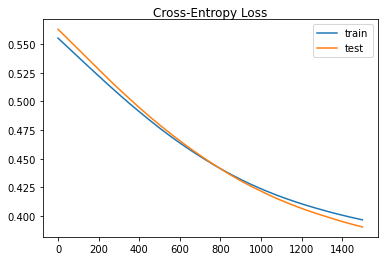

In [19]:
# Plot loss learning curves 
#pyplot.subplot(211)
pyplot.title('Cross-Entropy Loss', pad=-40)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()



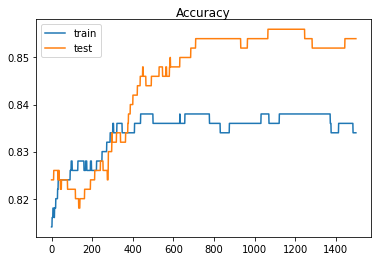

In [23]:
# Plot accuracy learning curves

#pyplot.subplot(212)
pyplot.title('Accuracy', pad=-40)
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

<font color='orange'>Nosso próximo trabalho</font>

Executaremos o código com cada tipo de gradiente descendente (lote, minibatch e estocástico) e descreveremos o efeito que tem nas curvas de aprendizado durante o treinamento.

Também, na próxima lição você descobrirá como ajustar um modelo durante o treinamento com uma programação de taxa de aprendizado.